<a href="https://colab.research.google.com/github/gulabpatel/Anomaly_Detection_Python/blob/main/Part%201.5%20Denoising_thresholding_Keypoints_Detectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Help is available on the video 

[Denoising](https://www.youtube.com/watch?v=-Qnb8Wv2p1c&list=PLZsOBAyNTZwYx-7GylDo3LSYpSompzsqW&index=11)

[Equalization and thresholding](https://www.youtube.com/watch?v=XfDkg3z3BCg&list=PLZsOBAyNTZwYx-7GylDo3LSYpSompzsqW&index=12)

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

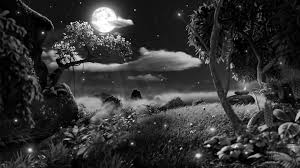

In [ ]:
img = cv.imread('image.jpg',0)
cv2_imshow(img)

In [ ]:
kernel = np.ones((3,3), np.float32)/9

#Filter2D_blur

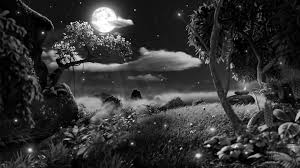

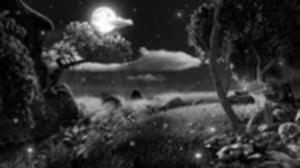

In [ ]:
filt_2D = cv.filter2D(img,-1,kernel)
cv2_imshow(img)

cv2_imshow(filt_2D)

##Blur

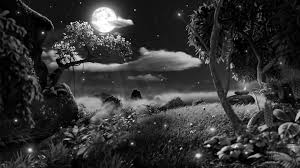

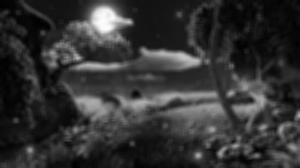

In [ ]:
blur = cv.blur(img,(5,5))
cv2_imshow(img)
cv2_imshow(blur)

#GaussianBlur

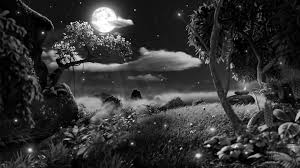

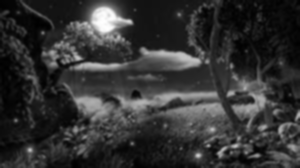

In [ ]:
gaussian_blur = cv.GaussianBlur(img,(3,3), 0)
cv2_imshow(img)
cv2_imshow(gaussian_blur)

#MedianBlur

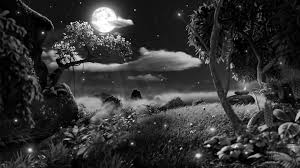

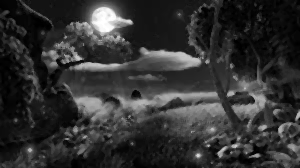

In [ ]:
median_blur = cv.medianBlur(img,3)
cv2_imshow(img)
cv2_imshow(median_blur)

#Bilateral_blur

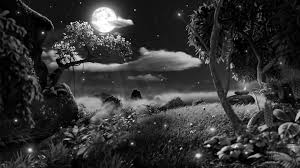

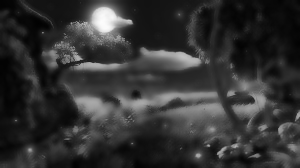

In [ ]:
bilateral_blur = cv.bilateralFilter(img,9, 75,75)
cv2_imshow(img)
cv2_imshow(bilateral_blur)

**nonlocal_means avaiable in skimage**

#Equalization and thresholding


[alloy image](https://www.google.com/search?q=alloy+wallpaper&rlz=1C1CHBD_enIN928IN928&sxsrf=ALeKk01rnfXe2PsIvV0rDyaP39vWysJ11g:1613644482531&tbm=isch&source=iu&ictx=1&fir=Wro5vvCQWXLL5M%252CjRhacFY-6GFoNM%252C_&vet=1&usg=AI4_-kS_wwAJMq3TNjP1TGWfsgS6RijIRg&sa=X&ved=2ahUKEwjK7rKRnvPuAhXkwjgGHeSQBjYQ9QF6BAgHEAE&biw=701&bih=604#imgrc=Wro5vvCQWXLL5M)

Histogram equalization often makes images easy to threshold and further segment. This tutorial demonstrates the use of Contrast Limited Adaptive Histogram Equalization (CLAHE) and subsequent thresholding using openCV library in Python.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

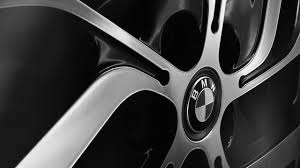

In [ ]:
img = cv.imread("alloy.jpg",0)
cv2_imshow(img)

##equalization

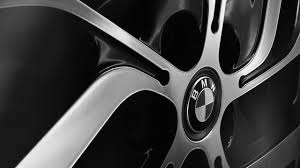

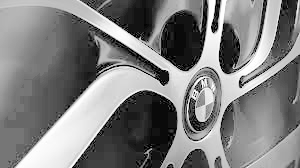

In [ ]:
eq_img = cv.equalizeHist(img)
cv2_imshow(img)
cv2_imshow(eq_img)

(array([1290., 4472., 2451., 3352., 1867., 2098., 1330., 1969., 1243.,
        3596., 1420.,  795.,  933.,  595.,  893.,  540., 1033.,  709.,
         832.,  483.,  720.,  680.,  423.,  771.,  450.,  615.,  349.,
         356.,  161.,  205.,  208.,  112.,  164.,  138.,  197.,  148.,
         207.,  157.,  209.,  147.,  194.,  171.,  102.,  177.,  123.,
         187.,  116.,  181.,  119.,  171.,  213.,  137.,  191.,  128.,
         212.,  157.,  260.,  168.,  298.,  236.,  589.,  609.,  322.,
         465.,  268.,  405.,  238.,  354.,  230.,  343.,  352.,  199.,
         276.,  189.,  277.,  188.,  233.,  161.,  234.,  168.,  219.,
         187.,  113.,  231.,  143.,  233.,  157.,  266.,  151.,  192.,
         152.,   80.,  103.,   57.,   56.,   36.,   35.,   10.,    9.,
          11.]),
 array([  0.  ,   2.55,   5.1 ,   7.65,  10.2 ,  12.75,  15.3 ,  17.85,
         20.4 ,  22.95,  25.5 ,  28.05,  30.6 ,  33.15,  35.7 ,  38.25,
         40.8 ,  43.35,  45.9 ,  48.45,  51.  ,  53.55,  5

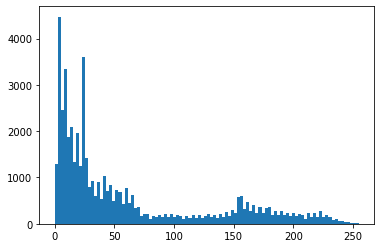

In [ ]:
#Histogram of original image
plt.hist(img.flat, bins=100, range=(0,255))

(array([1031.,  259.,    0., 1413.,    0.,    0.,    0., 1795.,    0.,
           0., 1264.,  954.,    0.,    0., 1497.,    0., 1018.,    0.,
           0., 1158.,    0., 1176.,    0.,  847.,    0., 1020.,  667.,
           0.,  664.,  767.,  684.,    0.,  646.,  706.,  607.,    0.,
         656.,  597.,  646.,    0.,  991.,    0.,  688.,    0.,    0.,
           0., 1917.,  521.,  482.,  787.,  425.,  636.,  589.,  303.,
         590.,  303.,  540.,  296.,  737.,  343.,  661.,  537.,  483.,
         486.,  450.,  661.,  458.,  539.,  231.,  640.,  706.,  354.,
         628.,  396.,  583.,  364.,  615.,  376.,  529.,  424.,  556.,
         623.,  339.,  589.,  428.,  503.,  465.,  559.,  352.,  584.,
         584.,  406.,  646.,  337.,  647.,  347.,  621.,  399.,  579.,
         495.]),
 array([  0.  ,   2.55,   5.1 ,   7.65,  10.2 ,  12.75,  15.3 ,  17.85,
         20.4 ,  22.95,  25.5 ,  28.05,  30.6 ,  33.15,  35.7 ,  38.25,
         40.8 ,  43.35,  45.9 ,  48.45,  51.  ,  53.55,  5

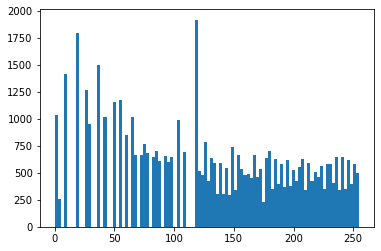

In [ ]:
#Histogram equalization
plt.hist(eq_img.flat, bins=100, range=(0,255))

#Contrast limited Adaptive histogram equalization

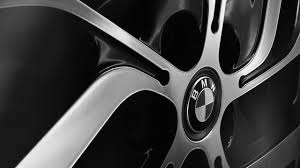

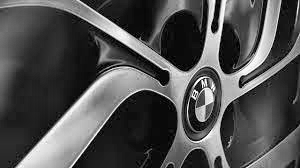

In [ ]:
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe.apply(img)

cv2_imshow(img)
cv2_imshow(clahe_img)

(array([ 693.,  391.,  298., 1729., 1534., 1878., 1207., 1949., 1145.,
        2063., 1838., 1258., 2324., 1077., 1335.,  816., 1443.,  817.,
         835.,  413.,  585.,  599.,  378.,  608.,  435.,  685.,  452.,
         618.,  429.,  654.,  544.,  328.,  491.,  342.,  530.,  371.,
         398.,  283.,  504.,  268.,  454.,  406.,  228.,  362.,  205.,
         296.,  214.,  293.,  209.,  308.,  297.,  210.,  324.,  200.,
         301.,  241.,  344.,  217.,  317.,  272.,  365.,  373.,  223.,
         310.,  264.,  376.,  218.,  353.,  244.,  417.,  494.,  308.,
         430.,  298.,  415.,  284.,  412.,  258.,  357.,  251.,  305.,
         280.,  205.,  267.,  176.,  265.,  170.,  252.,  158.,  235.,
         212.,  138.,  179.,   92.,  165.,   97.,  123.,   67.,   80.,
          41.]),
 array([  0.  ,   2.55,   5.1 ,   7.65,  10.2 ,  12.75,  15.3 ,  17.85,
         20.4 ,  22.95,  25.5 ,  28.05,  30.6 ,  33.15,  35.7 ,  38.25,
         40.8 ,  43.35,  45.9 ,  48.45,  51.  ,  53.55,  5

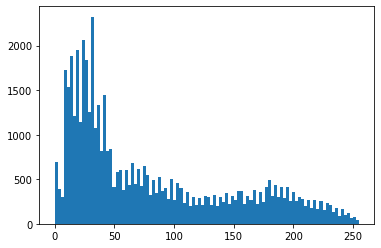

In [ ]:
#Adoptive histogram equalization
plt.hist(clahe_img.flat, bins=100, range=(0,255))

#Thresholding

##THRESH_BINARY and THRES_BINARY_INV

In [ ]:
ret1, thres1 = cv.threshold(clahe_img, 190, 250, cv.THRESH_BINARY)
ret2, thres2 = cv.threshold(clahe_img, 190, 255, cv.THRESH_BINARY_INV)

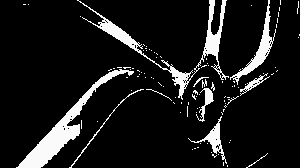

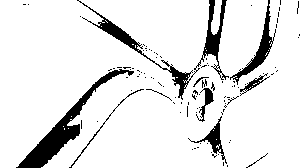

In [ ]:
cv2_imshow(thres1)
cv2_imshow(thres2)

In [ ]:
#thresholding histogram 
# plt.hist(thres1.flat, bins=100, range=(0,255))
# plt.hist(thres2.flat, bins=100, range=(0,255))

##OSTU thresholding

In [ ]:
ret3, thres3 = cv.threshold(clahe_img, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

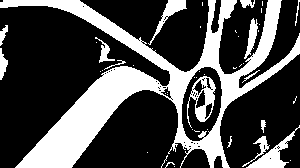

In [ ]:
cv2_imshow(thres3)

#Morphological Operations

In [ ]:
import cv2 as cv
from googl.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

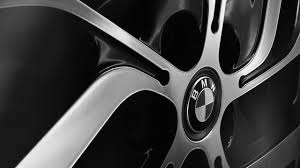

In [ ]:
img = cv.imread('alloy.jpg',0)
cv2_imshow(img)

In [ ]:
ret, thres = cv.threshold(img, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

In [ ]:
ret  #optimal value calculated by OSTU method

97.0

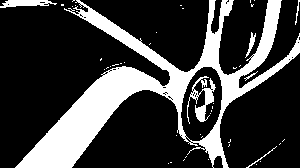

In [ ]:
cv2_imshow(thres)

##Erosion and Dilation
Erosion - removal of pixel<br>
Dilation - addition of pixel

In [ ]:
kernel = np.ones((3,3), np.uint8)
print(kernel)

[[1 1 1]
 [1 1 1]
 [1 1 1]]


##Erosion

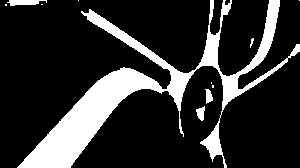

In [ ]:
erosion = cv.erode(thres, kernel, iterations=1) #removal of pixel values
cv2_imshow(erosion)

##Dilation

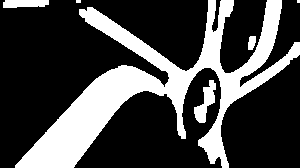

In [ ]:
dilation = cv.dilate(erosion, kernel, iterations=2) #addition of pixel values
cv2_imshow(dilation) #addition of pixel values

##Opening

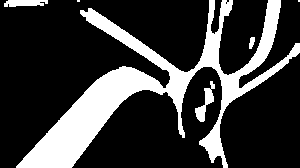

In [ ]:
opening = cv.morphologyEx(thres, cv.MORPH_OPEN, kernel)  #Errosion followed by dilation
cv2_imshow(opening) 

##Closing

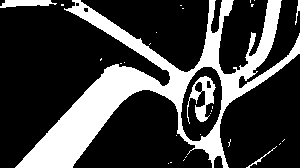

In [ ]:
closing = cv.morphologyEx(thres, cv.MORPH_CLOSE, kernel)  #Dilation followed by errosion
cv2_imshow(closing) 

##GRADIENT

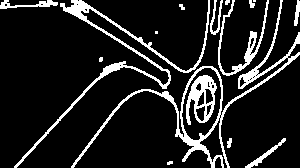

In [ ]:
gradient = cv.morphologyEx(thres, cv.MORPH_GRADIENT, kernel)  #Difference between the dilated and erroded image
cv2_imshow(gradient) 

##Tophat

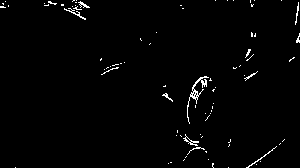

In [ ]:
tophat = cv.morphologyEx(thres, cv.MORPH_TOPHAT, kernel)  #Difference between the input and opened image
cv2_imshow(tophat) 

##Blackhat

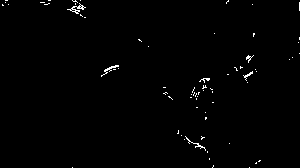

In [ ]:
blackhat = cv.morphologyEx(thres, cv.MORPH_BLACKHAT, kernel)  #Opposite of tophat
cv2_imshow(blackhat)

#Key points, detectors and descriptors

Help is available [here](https://www.youtube.com/watch?v=DZtUt4bKtmY&list=PLZsOBAyNTZwYx-7GylDo3LSYpSompzsqW&index=14)

Keypoints are points of interest in an image that can be used to compare images and perform tasks such as image alignment and registration. These points can be automatically detected (defined) by the system using algorithms such as SIFT, SURF, and ORB. Some of these algorithms can also define the descriptors to make key points really useful for image processing tasks. This tutorial introduces a few key point detectors and descriptors.

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img = cv.imread('group.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)  #Harris works on float32 images. 


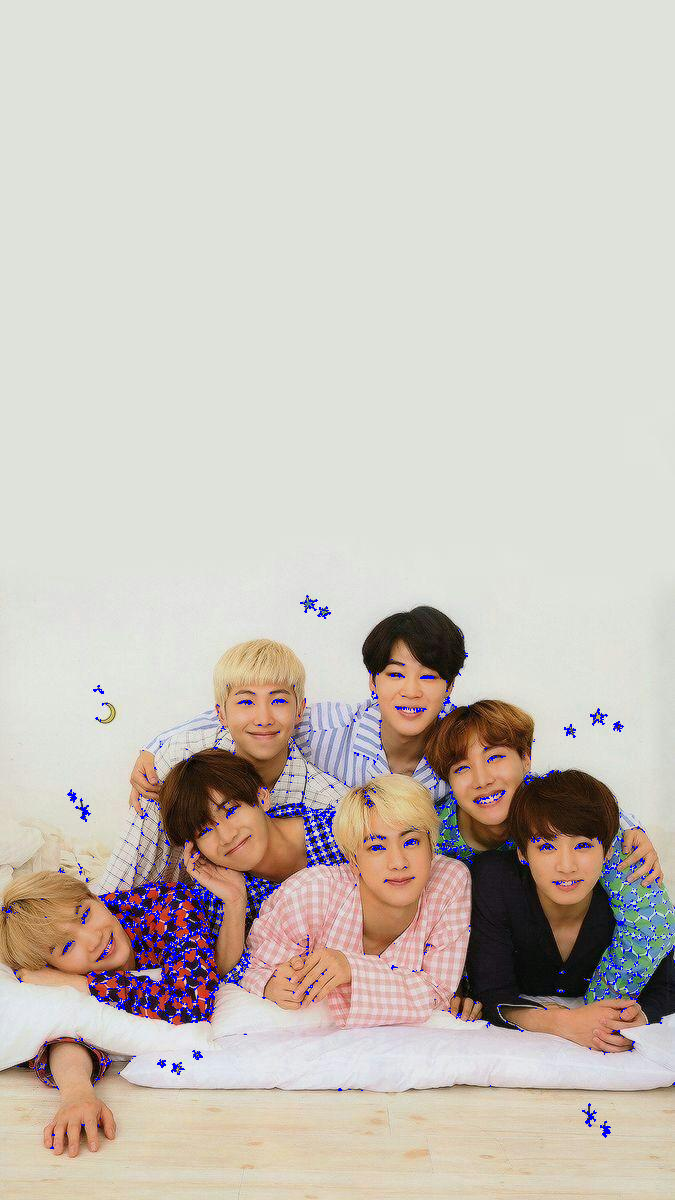

In [ ]:
#Input parameters
# image, block size (size of neighborhood considered), ksize (aperture parameter for Sobel), k
harris = cv.cornerHarris(gray,2,3,0.04)  

# Threshold for an optimal value, it may vary depending on the image.
img[harris>0.01*harris.max()]=[255,0,0]    # replace these pixels with blue

cv2_imshow(img)

 Shi-Tomasi Corner Detector & Good Features to Track
 
 In opencv it is called goodfeaturestotrack


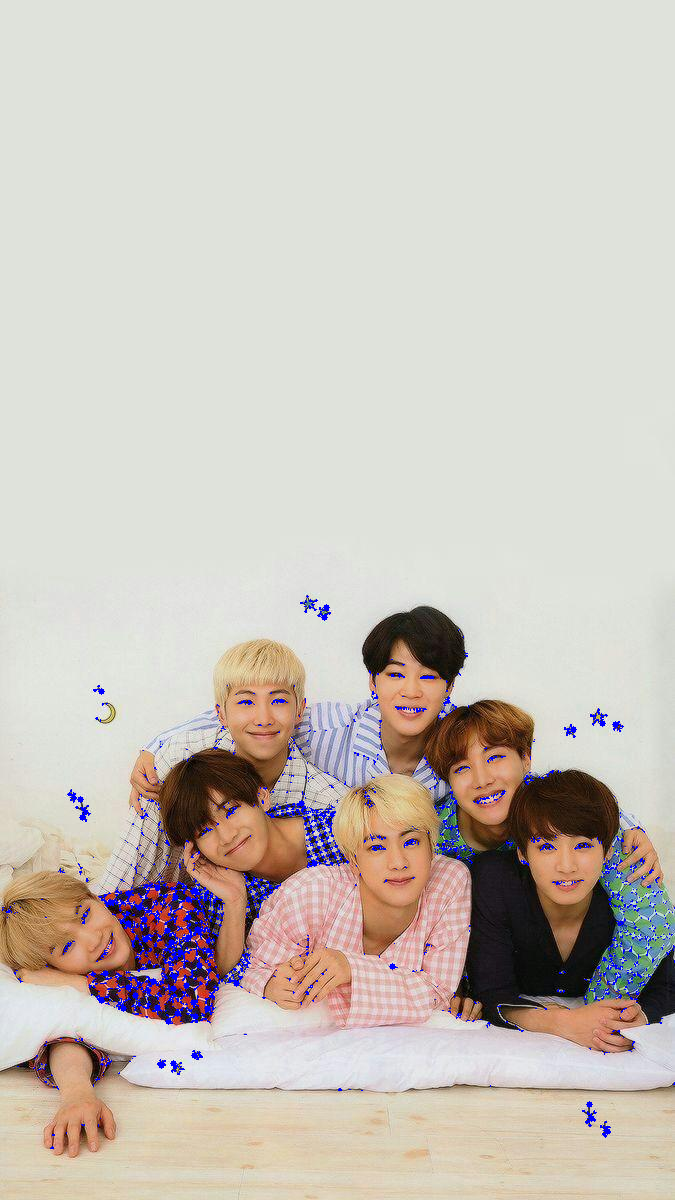

In [ ]:
corners = cv.goodFeaturesToTrack(gray,50,0.05,10)
corners = np.int0(corners)   #np.int0 is int64

for i in corners:
    x,y = i.ravel()   # Ravel Returns a contiguous flattened array.
#    print(x,y)
    cv.circle(img,(x,y),3,255,-1)  #Draws circle (Img, center, radius, color, etc.)

cv2_imshow(img)

SIFT stands for scale invariant feature transform
#####################################

 FAST

 Features from Accelerated Segment Test

 High speed corner detector
 
 FAST is only keypoint detector. Cannot get any descriptors. 


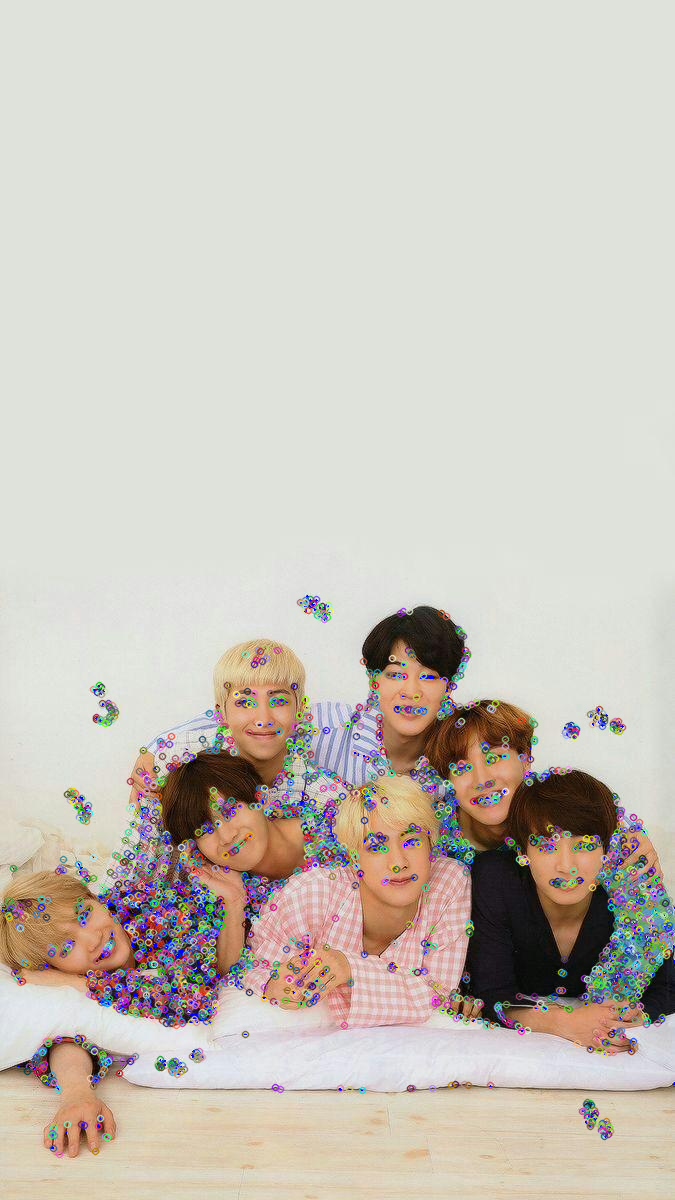

In [ ]:
# Initiate FAST object with default values
detector = cv.FastFeatureDetector_create(50)   #Detects 50 points

kp = detector.detect(img, None)

img2 = cv.drawKeypoints(img, kp, None, flags=0)

cv2_imshow(img2)

ORB

 Oriented FAST and Rotated BRIEF<br>
 An efficient alternative to SIFT or SURF
 ORB is basically a fusion of FAST keypoint detector and BRIEF descriptor


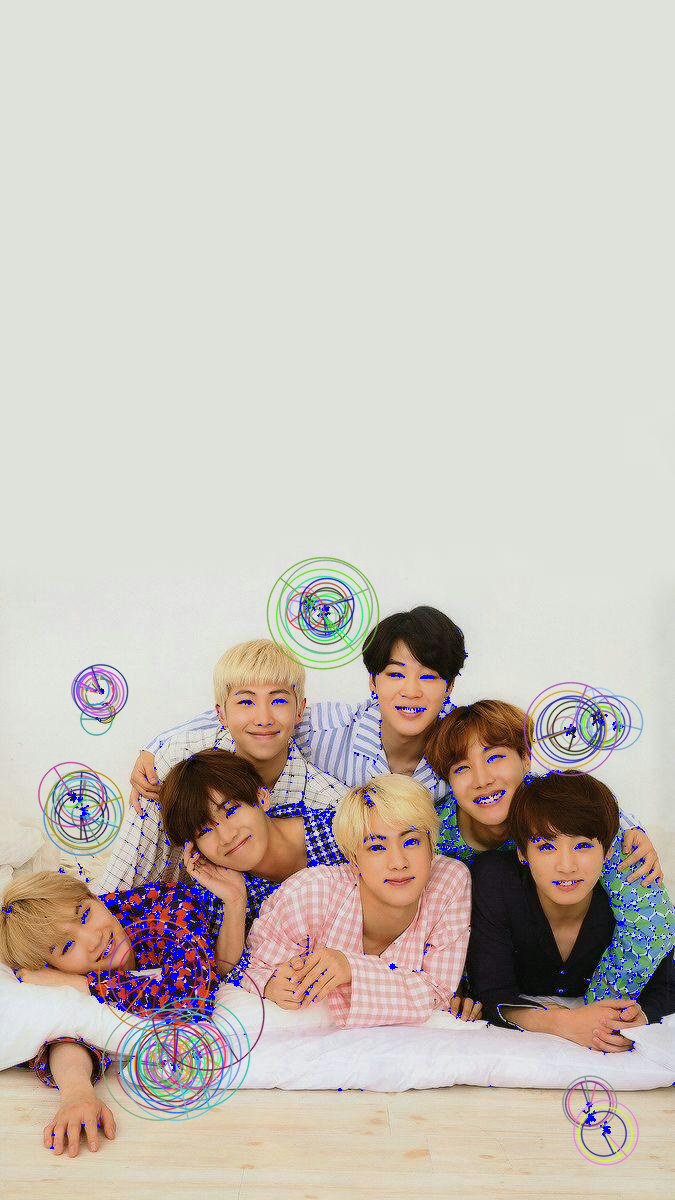

In [ ]:
orb = cv.ORB_create(100)
kp, des = orb.detectAndCompute(img, None)
# draw only keypoints location,not size and orientation
#img2 = cv2.drawKeypoints(img, kp, None, flags=None)
# Now, let us draw with rich key points, reflecting descriptors. 
# Descriptors here show both the scale and the orientation of the keypoint.
img2 = cv.drawKeypoints(img, kp, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2_imshow(img2)

---------------------------------

#Image Registration

Image registration is one of the common tasks performed by microscopists working with 3D data sets. There are excellent algorithms available for registration. Homography allows image registration by using descriptors of keypoints generated by SIFT, SURF, ORB or similar keypoint descriptors. This tutorial demonstrates the process using a distorted image and corresponding reference image.

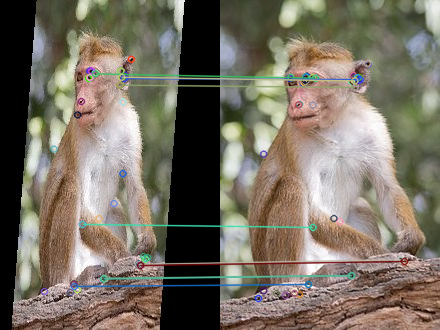

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

im1 = cv2.imread('monkey_distorted.jpg')          # Image that needs to be registered.
im2 = cv2.imread('monkey.jpg') # trainImage

img1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

# Initiate ORB detector
orb = cv2.ORB_create(50)  #Registration works with at least 50 points

# find the keypoints and descriptors with orb
kp1, des1 = orb.detectAndCompute(img1, None)  #kp1 --> list of keypoints
kp2, des2 = orb.detectAndCompute(img2, None)

#Brute-Force matcher takes the descriptor of one feature in first set and is 
#matched with all other features in second set using some distance calculation.
# create Matcher object

matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)

# Match descriptors.
matches = matcher.match(des1, des2, None)  #Creates a list of all matches, just like keypoints

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

#Like we used cv2.drawKeypoints() to draw keypoints, 
#cv2.drawMatches() helps us to draw the matches. 
#https://docs.opencv.org/3.0-beta/modules/features2d/doc/drawing_function_of_keypoints_and_matches.html
# Draw first 10 matches.
img3 = cv2.drawMatches(im1,kp1, im2, kp2, matches[:10], None)

cv2_imshow(img3)

Estimated homography : 
 [[ 1.58086690e+00  1.32767006e-01 -6.29327345e+01]
 [-1.47000605e-02  1.02210326e+00  6.27648927e+00]
 [ 1.84423603e-04  1.14677972e-04  1.00000000e+00]]


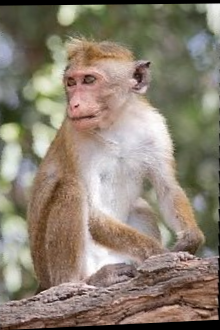

In [ ]:
#Now let us use these key points to register two images. 
#Can be used for distortion correction or alignment
#For this task we will use homography. 
# https://docs.opencv.org/3.4.1/d9/dab/tutorial_homography.html

# Extract location of good matches.
# For this we will use RANSAC.
#RANSAC is abbreviation of RANdom SAmple Consensus, 
#in summary it can be considered as outlier rejection method for keypoints.
#http://eric-yuan.me/ransac/
#RANSAC needs all key points indexed, first set indexed to queryIdx
#Second set to #trainIdx. 

points1 = np.zeros((len(matches), 2), dtype=np.float32)  #Prints empty array of size equal to (matches, 2)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
   points1[i, :] = kp1[match.queryIdx].pt    #gives index of the descriptor in the list of query descriptors
   points2[i, :] = kp2[match.trainIdx].pt    #gives index of the descriptor in the list of train descriptors

#Now we have all good keypoints so we are ready for homography.   
# Find homography
#https://en.wikipedia.org/wiki/Homography_(computer_vision)
  
h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)
 
  # Use homography
height, width, channels = im2.shape
im1Reg = cv2.warpPerspective(im1, h, (width, height))  #Applies a perspective transformation to an image.
   
print("Estimated homography : \n",  h)

cv2_imshow(im1Reg)

#Cell Nuclei analysis watershed segmentation

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage
from skimage import measure, color, io

img = cv2.imread("Osteosarcoma_01.tif")
#Extract only blue channel as DAPI / nuclear (blue) staining is the best
#channel to perform cell count.
cells=img[:,:,0]  #Blue channel. Image equivalent to grey image.


pixels_to_um = 0.454 # 1 pixel = 454 nm (got this from the metadata of original image)

#Threshold image to binary using OTSU. ALl thresholded pixels will be set to 255
ret1, thresh = cv2.threshold(cells, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)


# Morphological operations to remove small noise - opening
#To remove holes we can use closing
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

from skimage.segmentation import clear_border
opening = clear_border(opening) #Remove edge touching grains
#Check the total regions found before and after applying this. 

#Now we know that the regions at the center of cells is for sure cells
#The region far away is background.
#We need to extract sure regions. For that we can use erode. 
#But we have cells touching, so erode alone will not work. 
#To separate touching objects, the best approach would be distance transform and then thresholding.

# let us start by identifying sure background area
# dilating pixes a few times increases cell boundary to background. 
# This way whatever is remaining for sure will be background. 
#The area in between sure background and foreground is our ambiguous area. 
#Watershed should find this area for us. 
sure_bg = cv2.dilate(opening,kernel,iterations=10)

# Finding sure foreground area using distance transform and thresholding
#intensities of the points inside the foreground regions are changed to 
#distance their respective distances from the closest 0 value (boundary).
#https://www.tutorialspoint.com/opencv/opencv_distance_transformation.htm
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)


#Let us threshold the dist transform by starting at 1/2 its max value.
#print(dist_transform.max()) gives about 21.9
ret2, sure_fg = cv2.threshold(dist_transform,0.5*dist_transform.max(),255,0)

#Later you realize that 0.25* max value will not separate the cells well.
#High value like 0.7 will not recognize some cells. 0.5 seems to be a good compromize

# Unknown ambiguous region is nothing but bkground - foreground
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

#Now we create a marker and label the regions inside. 
# For sure regions, both foreground and background will be labeled with positive numbers.
# Unknown regions will be labeled 0. 
#For markers let us use ConnectedComponents. 
ret3, markers = cv2.connectedComponents(sure_fg)

#One problem rightnow is that the entire background pixels is given value 0.
#This means watershed considers this region as unknown.
#So let us add 10 to all labels so that sure background is not 0, but 10
markers = markers+10

# Now, mark the region of unknown with zero
markers[unknown==255] = 0
#plt.imshow(markers, cmap='jet')   #Look at the 3 distinct regions.

#Now we are ready for watershed filling. 
markers = cv2.watershed(img,markers)
#The boundary region will be marked -1
#https://docs.opencv.org/3.3.1/d7/d1b/group__imgproc__misc.html#ga3267243e4d3f95165d55a618c65ac6e1

#Let us color boundaries in yellow. 
img[markers == -1] = [0,255,255]  

img2 = color.label2rgb(markers, bg_label=0)

#cv2.imshow('Overlay on original image', img)
#cv2.imshow('Colored Grains', img2)
#cv2.waitKey(0)

#Now, time to extract properties of detected cells
# regionprops function in skimage measure module calculates useful parameters for each object.
regions = measure.regionprops(markers, intensity_image=cells)

#Can print various parameters for all objects
for prop in regions:
    print('Label: {} Area: {}'.format(prop.label, prop.area))

#Best way is to output all properties to a csv file
#Let us pick which ones we want to export. 

propList = ['Area',
            'equivalent_diameter', #Added... verify if it works
            'orientation', #Added, verify if it works. Angle btwn x-axis and major axis.
            'MajorAxisLength',
            'MinorAxisLength',
            'Perimeter',
            'MinIntensity',
            'MeanIntensity',
            'MaxIntensity']    
    

output_file = open('cell_measurements.csv', 'w')
output_file.write(',' + ",".join(propList) + '\n') #join strings in array by commas, leave first cell blank
#First cell blank to leave room for header (column names)

for region_props in regions:
    #output cluster properties to the excel file
    output_file.write(str(region_props['Label']))
    for i,prop in enumerate(propList):
        if(prop == 'Area'): 
            to_print = region_props[prop]*pixels_to_um**2   #Convert pixel square to um square
        elif(prop == 'orientation'): 
            to_print = region_props[prop]*57.2958  #Convert to degrees from radians
        elif(prop.find('Intensity') < 0):          # Any prop without Intensity in its name
            to_print = region_props[prop]*pixels_to_um
        else: 
            to_print = region_props[prop]     #Reamining props, basically the ones with Intensity in its name
        output_file.write(',' + str(to_print))
    output_file.write('\n')